<a href="https://colab.research.google.com/github/hjn14133/Machine-Learning/blob/main/LightGBM_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initial Setup
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset
df = pd.read_csv("FT_join_JH_cleaned.csv")

#Select columns
X = df[['DISTANCE', 'Heading','Elevation', 'AppliedRat']]
y = df['VRYIELDBAL']

In [4]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [6]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMRegressor()
clf.fit(X_train, y_train)

LGBMRegressor()

In [7]:
# predict the results
y_pred=clf.predict(X_test)

In [9]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [11]:
print('Training Coefficient of R^2 : %.3f'%clf.score(X_train, y_train))
print('Test Coefficient of R^2 : %.3f'%clf.score(X_test, y_test))

Training Coefficient of R^2 : 0.763
Test Coefficient of R^2 : 0.653


In [14]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.38 .
Accuracy: 68.0 %.


In [21]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
importances = importances/sum(importances)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DISTANCE             Importance: 0.45
Variable: Elevation            Importance: 0.21
Variable: AppliedRat           Importance: 0.21
Variable: Heading              Importance: 0.14


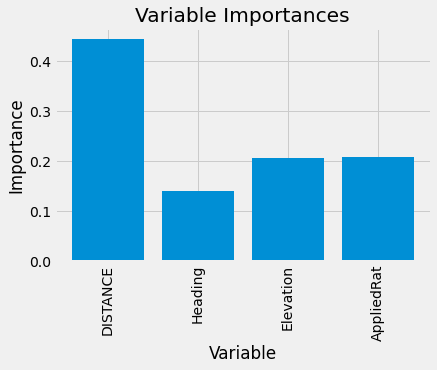

In [22]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');